In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt
import scipy.stats as stats
import cloveFunctions as clv
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
import warnings
warnings.filterwarnings('ignore')

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
# load TCGA BRCA data
het_results = pd.read_csv('brca_1M_clove.tab.gz', compression='gzip', sep='\t')


In [34]:
# compute CCLE BRCA cloves
bexp, bcnv = clv.mainFitler('breast_mrna_df.pickle', var=0.2, n=7)
scores = clv.randomPairContextStat(1000000, bexp, bcnv, permute=True)

In [16]:
# verticies (exp genes) with most significant egdes (to cnv genes)
# TCGA BRCA

print((het_results.shape[0] - het_results[het_results['np_p_w'] < 0.001].shape[0])/ het_results.shape[0], "p=0.001 cutoff loss")

pd.DataFrame(het_results.groupby(['exp']).size(), columns=['count']).sort_values(by='count', ascending=False).head(20).transpose()

0.8371085226673588 p=0.001 cutoff loss


exp,AIM1,OR6T1,ISOC2,DNAJC17,ANKMY1,RPL18,FZD1,C9orf7,TMEM198,TMEM232,VAC14,RPRD1A,NAA20,MT4,ATP6AP1L,FATE1,SH3BGRL2,CCNT1,GABRA2,TBCB
count,77,76,76,76,75,75,75,74,74,74,73,72,72,72,72,72,72,72,72,72


In [113]:
# top/bot 10k clove t-stats

#ccle
scores['type'] = 'CCLE'
ccle_top = scores.sort_values(by='np_t_w', ascending=False).head(10000)[['exp','cnv','np_t_w','np_p_w','type']]
ccle_bot = scores.sort_values(by='np_t_w', ascending=True).head(10000)[['exp','cnv','np_t_w','np_p_w','type']]

#tcga
het_results['type'] = 'TCGA'
tcga_top = het_results.sort_values(by='np_t_w', ascending=False).head(10000)[['exp','cnv','np_t_w','np_p_w','type']]
tcga_bot = het_results.sort_values(by='np_t_w', ascending=True).head(10000)[['exp','cnv','np_t_w','np_p_w','type']]



In [114]:
box_data_top = pd.concat([pd.DataFrame(ccle_top), pd.DataFrame(tcga_top)])
box_data_bot = pd.concat([pd.DataFrame(ccle_bot), pd.DataFrame(tcga_bot)])

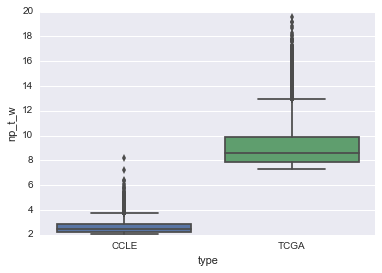

In [115]:
%matplotlib inline
sns.boxplot(x='type', y='np_t_w', data=box_data_top)

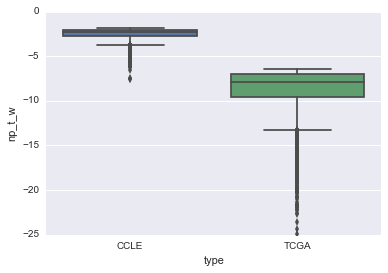

In [116]:
%matplotlib inline
sns.boxplot(x='type', y='np_t_w', data=box_data_bot)

In [122]:
#reindex both TCGA and CCLE results df, and reset index for calculations
het_results['pair'] = het_results['exp'] + ' : ' + het_results['cnv']
tcga = pd.DataFrame(het_results.set_index('pair')[['np_t_w','np_p_w']])
tcga.columns = [['TCGA','TCGA_p']]

scores['pair'] = scores['exp'] + ' : ' + scores['cnv']
ccle = pd.DataFrame(scores.set_index('pair')[['np_t_w','np_p_w']])
ccle.columns = [['CCLE','CCLE_p']]

merged = pd.merge(tcga, ccle, how='inner', left_index=True, right_index=True)

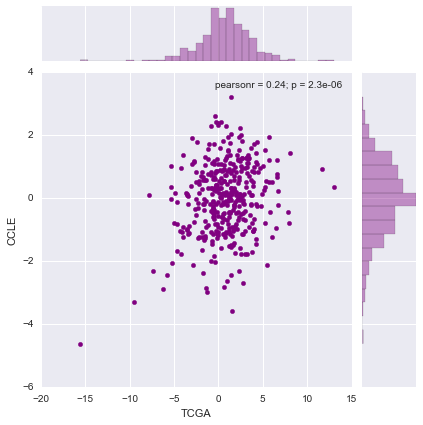

In [123]:
%matplotlib inline
sns.jointplot(data=merged, x='TCGA', y='CCLE', color='purple')

In [124]:
merged['abs_diff'] = abs(merged['TCGA'] - merged['CCLE'])
merge_sort = merged.sort_values(by='abs_diff', ascending=False)
merge_sort.head()

,TCGA,TCGA_p,CCLE,CCLE_p,abs_diff
pair,,,,,
DEK : IL5,12.991551,6.300324e-36,0.349958,0.72766,12.6416
TSR1 : P2RX5,-15.552545,2.659855e-49,-4.62833,2.17332e-05,10.9242
RFC4 : PCDHA10,11.667701,1.097377e-29,0.911431,0.365907,10.7563
GEN1 : ZBTB42,7.974923,3.914921e-15,-0.817431,0.417086,8.79235
OCRL : FNDC5,7.781053,1.695290e-14,-0.464296,0.644204,8.24535


In [125]:
merge_sort[merge_sort['abs_diff'] < 0.75].sort_values(by='TCGA', ascending=False).head(20)

,TCGA,TCGA_p,CCLE,CCLE_p,abs_diff
pair,,,,,
MRPS26 : MLEC,2.582179,0.009951,1.99818,0.0504759,0.583998
DCUN1D5 : GPS2,2.439519,0.014869,2.21486,0.0307824,0.224663
ADNP : SNORD116-29,2.325801,0.020216,1.90995,0.0611765,0.415855
DHCR24 : USP17L8,2.048079,0.040797,1.35794,0.179833,0.690135
LRBA : CENPT,1.696337,0.090115,1.07021,0.289037,0.62613
PRPF4 : BNIP3L,1.440928,0.149899,2.03635,0.0463706,0.595424
SMCHD1 : TLL1,1.365785,0.172295,0.798874,0.42768,0.566911
UBA3 : MIR149,1.307502,0.191325,1.10321,0.274572,0.204292
SF3A3 : MBD5,1.296459,0.195099,1.73798,0.0876152,0.441517


In [132]:
model = pd.ols(y=merge_sort.TCGA, x=merge_sort.CCLE)
merge_sort['resid'] = model.resid
merge_sort['resid_abs'] = abs(merge_sort['resid'])

merge_sort.to_csv('tcga_vs_ccle_BRCA', compression='gzip')

#indices to annotate
merge_sort[(merge_sort['TCGA_p'] < 0.1) &
          (merge_sort['CCLE_p'] < 0.1)].sort_values(by='resid_abs', ascending=True)[['TCGA','TCGA_p','CCLE','CCLE_p','resid']].head(20)

,TCGA,TCGA_p,CCLE,CCLE_p,resid
pair,,,,,
DCUN1D5 : GPS2,2.439519,1.486934e-02,2.21486,0.0307824,0.293465
ADNP : SNORD116-29,2.325801,2.021640e-02,1.90995,0.0611765,0.368200
MRPS26 : MLEC,2.582179,9.950587e-03,1.99818,0.0504759,0.570044
CTCF : INCENP,2.613891,9.078162e-03,1.80309,0.0766609,0.722335
TTC35 : RANBP10,-1.726621,8.452607e-02,-2.37435,0.0209702,-1.036254
PCGF2 : ZNF430,1.812377,7.020968e-02,-1.74099,0.0870806,2.111291
FTSJ2 : SEC31B,4.026033,6.074862e-05,1.70588,0.0934743,2.194558
CTBS : NPS,-2.841394,4.577404e-03,-2.14075,0.0365841,-2.295401
PROSC : USP45,4.337250,1.579867e-05,1.76244,0.0833561,2.470818


## COMPARE LUADs (TCGA and CCLE)

In [ ]:
# select LUAD data from 

luad_samples = list(pd.read_json('LUAD_cases_2018-03-23.json')['submitter_id'])
exp = pd.read_csv('exp_tab.gz', compression='gzip', sep='\t', error_bad_lines = False )
cnv = pd.read_csv('cnv_tab.gz', compression='gzip', sep='\t', error_bad_lines = False )

luad_cnv, luad_exp = clv.tcgaTissueSelect(luad_samples, 'luad', cnv, exp)

In [3]:
luad_samples = list(pd.read_json('LUAD_cases_2018-03-23.json')['submitter_id'])

mylist = []
for chunk in  pd.read_csv('exp_tab.gz', compression='gzip', chunksize=20000):
    mylist.append(chunk)
exp = pd.concat(mylist, axis= 0)
del mylist

CParserError: Error tokenizing data. C error: out of memory

compute exactly the same clove pairs as another clove results df

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt
import scipy.stats as stats
from cloveFunctions import *
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
import warnings
warnings.filterwarnings('ignore')

def matchPairContextStat(expdf, cnvdf, new_cohort, matchdf, match_cohort, nan_style='omit', permute=False):
    """
    computes clove pairs from one sample that match with those computed in some other cohorts
    
    :param expdf: pandas dataframe, expression by sample 
                    (hopefully filtered with mainFilter, tissue specific, with matching samples in cnv)
    :param cnvdf: pandas dataframe, binarized mask 5(1=delete, 0=nodelete) deletion by sample 
                    (hopefully filtered with mainFilter, tissue specific, with matching samples in exp)
    :param new_cohort: str, identifier for the current cohort computation (eg, tissue origin of exp and cnv)
    :param matchdf: pandas dataframe, results of clove computation performed in other cohort
                    exp and cnv pairs will be used to populate the new clove results so pairs match between cohort
    :param match_cohort: str, identifier for the matching (precomputed) cohort used (eg, tissue origin of matchdf)
    :param nan_style: str, how the stats.ttest_ind treats NANs, {‘propagate’, ‘raise’, ‘omit’}
    :param permute: bool, True will calculate pairs with randomly permuted expression matrix as null model
    
    returns df[['exp', 'cnv', 'cntxt_pos_mu', 'cntxt_neg_mu', 
                'cntxt_pos_var', 'cntxt_neg_var', 
                'cntxt_pos_n', 'cntxt_neg_n']]
    """
    
    cells = list(set(cnvdf.columns).intersection(expdf.columns)) # confirm same samples in both cnv and exp
    expdf = expdf[cells]
    cmask = cnvdf[cells] == 1
    
    df = matchdf[['exp', 'cnv', 'np_t_w', 'np_t_w_null','np_p_w']]
    df.columns = ['exp', 'cnv', 't_'+match_cohort, 't_null_'+match_cohort, 'p_'+match_cohort,]
    
    if permute:
        cmask_n = scrambleDF(cmask)
    
#     only keep elements of matchdf['exp'] that are also in expdf.index
    df = df[(df['exp'].isin(expdf.index)) & (df['cnv'].isin(cnvdf.index))]
    print('attempting {} comparisons referenced from {}'.format(df.shape[0], match_cohort))
    
    np_t_w, np_p_w, np_t_w_null = [], [], []
  
    # progress initialize
    count=0
    percent_complete=0
    comparisons = df.shape[0]
    
    for row in df.itertuples():
        # progress report
        count+=1
        if count%(comparisons/10)==0:
            print(np.array(expdf.loc[row.exp][cmask.loc[row.cnv]]))
            percent_complete+=10
            print('pair computation {}% complete ({}/{})'.format(percent_complete, count, comparisons))
        
        # mask cnv contexts onto expression data
        pos = np.array(expdf.loc[row.exp][cmask.loc[row.cnv]])
        neg = np.array(expdf.loc[row.exp][~cmask.loc[row.cnv]])
        
        # calculate t_stat, welch
        t, p = stats.ttest_ind(pos, neg, nan_policy=nan_style, equal_var=True)
        np_t_w.append(t)
        np_p_w.append(p)
        
        if permute:
            pos = np.array(expdf.loc[row.exp][cmask_n.loc[row.cnv]])
            neg = np.array(expdf.loc[row.exp][~cmask_n.loc[row.cnv]])
            t, p = stats.ttest_ind(pos, neg, nan_policy=nan_style, equal_var=True)
            np_t_w_null.append(t)
   
    df['t_'+new_cohort] = np_t_w
    df['p_'+new_cohort] = np_p_w
    
    if permute:
        df['t_null_'+new_cohort] = np_t_w_null
        
    return df

In [3]:
matchdf = pd.read_csv('data/tcga_lung_cloves.tab.gz', compression='gzip', sep='\t', index_col=0)

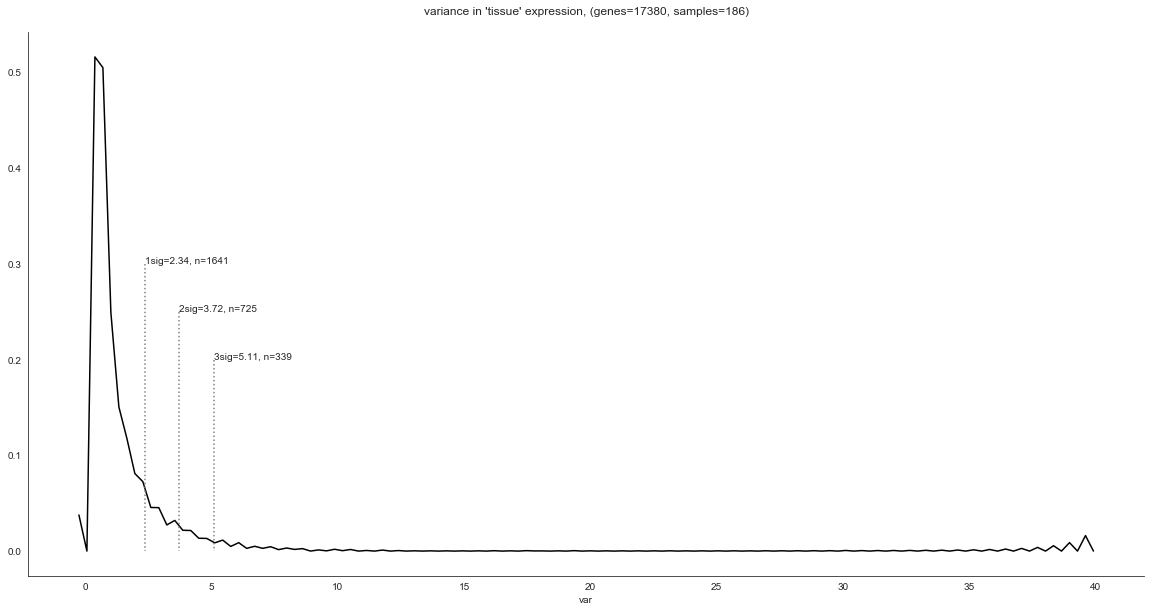

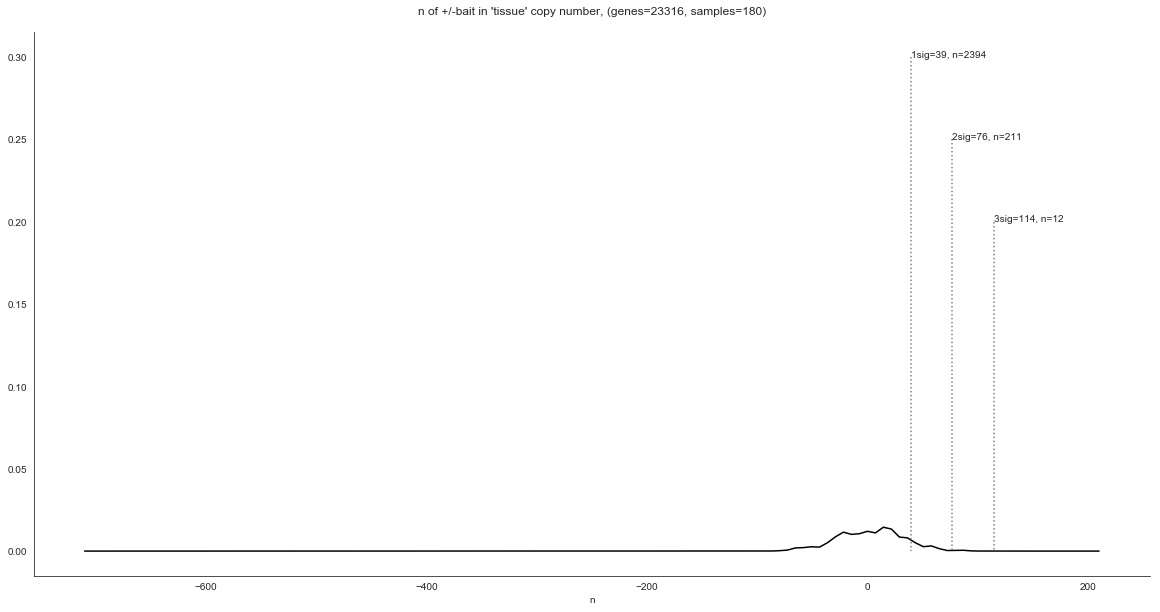

In [18]:
lungcnv, lungexp = clv.load_data('data/lung_mrna_df.pickle', 'data/lung_cnv_df.pickle')

In [5]:
lungcnv, lungexp = clv.mainFitler(lungexp, lungcnv, var=0.2, n=5)

exp: (23316, 180) --> filter --> (3763, 180)
cnv: (17380, 186) --> filter --> (4117, 180)
15492271 CLOvE pairs are possible with these parameters
estimated calculation time: 180.74316166666668min (~7sec/10k pairs)


In [20]:
lungresults = matchPairContextStat(lungexp, lungcnv, 'ccle_lung', matchdf, 'tcga_lung', nan_style='omit', permute=False)

attempting 586666 comparisons referenced from tcga_lung


In [23]:
lungresults.head()

,exp,cnv,t_tcga_lung,t_null_tcga_lung,p_tcga_lung,t_ccle_lung,p_ccle_lung
0,SURF4,GNAT3,1.111226,-0.623929,0.266741,NaN,NaN
1,SURF4,ABCA5,-2.390800,0.305388,0.016998,NaN,NaN
3,SURF4,TPST2,-4.443644,-0.302639,0.000010,NaN,NaN
4,SURF4,MED19,-1.233342,-0.289334,0.217741,NaN,NaN
5,SURF4,AGFG2,0.826497,-0.684317,0.408721,NaN,NaN


In [6]:
def allPairContextStat(expdf, cnvdf, nan_style='omit', permute=False, save='data_large/'):
    """
    computes all pairs (post filtering) 
    """
    
    cells = list(set(cnvdf.columns).intersection(expdf.columns))
    expdf = expdf[cells]
    cmask = cnvdf[cells] == 1
    
    if permute:
        if 'cn' in permute or 'copy number' in permute:
            cmask_n = scrambleDF(cmask)
            permute = 'cnv'
        if 'rna' in permute or 'exp' in permute or 'expression' in permute:
            expdf_n = scrambleDF(expdf)
            permute = 'exp'
        else:
            permute = 'cnv'
            cmask_n = scrambleDF(cmask)
    d = []    
    comparisons = len(expdf.index) * len(cnvdf.index)
    print('attempting {} comparisons with current parameters'.format(comparisons))
    count=0
    percent_complete=0
    
    for n in itertools.product(expdf.index, cnvdf.index):
        pos = np.array(expdf.loc[n[0]][cmask.loc[n[1]]])
        neg = np.array(expdf.loc[n[0]][~cmask.loc[n[1]]])
        t, p = stats.ttest_ind(pos, neg, nan_policy=nan_style, equal_var=True)    
        if permute=='cnv':
            pos = np.array(expdf.loc[n[0]][cmask_n.loc[n[1]]])
            neg = np.array(expdf.loc[n[0]][~cmask_n.loc[n[1]]])
            t_n, p_n = stats.ttest_ind(pos, neg, nan_policy=nan_style, equal_var=True)
            d.append({'count': count, 'exp': n[0], 'cnv':n[1], 'np_t_w':t, 'np_p_w':t,'np_t_w_null':t_n})
        elif permute=='exp':
            pos = np.array(expdf_n.loc[n[0]][cmask.loc[n[1]]])
            neg = np.array(expdf_n.loc[n[0]][~cmask.loc[n[1]]])
            t_n, p_n = stats.ttest_ind(pos, neg, nan_policy=nan_style, equal_var=True)
            d.append({'count': count, 'exp': n[0], 'cnv':n[1], 'np_t_w':t, 'np_p_w':t,'np_t_w_null':t_n})
        else: 
            d.append({'count': count, 'exp': n[0], 'cnv':n[1], 'np_t_w':t, 'np_p_w':t})
            
        # counter
        count+=1
        print(count)
        if count == 10:
            break
        if count%(comparisons/10)==0:
            percent_complete+=10
            print('pair computation {}% complete ({}/{})'.format(percent_complete, count, comparisons))
    
    df = pd.DataFrame(d)
    if save:
        df.to_csv(save, sep='\t', compression='gzip')
    return df

In [9]:
from cloveFunctions import scrambleDF
import itertools
lung_results = allPairContextStat(lungexp, lungcnv, permute='exp', save='data_large/lung_ccle_clove.tab.gz')
lung_results.to_csv('data_large/lung_ccle_clove_all.tab.gz', sep='\t', compression='gzip')

attempting 15492271 comparisons with current parameters
1
2
3
4
5
6
7
8
9
10


In [22]:
lung_results

NameError: name 'lung_results' is not defined

In [7]:
lung_results.to_csv('data_large/lung_ccle_clove_all.tab.gz', sep='\t', compression='gzip')

NameError: name 'lung_results' is not defined

In [ ]:
lung_results = clv.allPairContextStat

## Compare BREAST/BRCA

In [ ]:
matchdf = pd.read_csv('data/breast_ttest_real_samp.tab.gz')